In [56]:
import networkx as nx
import json
import matplotlib.pyplot as plt

from wordExplorer.utils import getWordData, loadWord2Vec, jsonSimi

In [57]:
def getCalculator(mName: str = None):
    if mName is not None:
        model = loadWord2Vec(mName)
    else:
        model = loadWord2Vec()

    def calcGraph(word: str, loc: str = './data/', apiKwargs: dict = None, word2vecKwargs: dict = None) -> nx.Graph:
        if apiKwargs is None:
            apiKwargs = {}

        if word2vecKwargs is None:
            word2vecKwargs = {}

        #Getting the raw graph structure
        try:
            with open(loc + f'synonyms/{word}.json', "r", encoding="utf-8") as f:
                data = json.load(f)
        except FileNotFoundError:
            data = getWordData(word, loc + 'synonyms/', **apiKwargs)
            with open(loc + f'synonyms/{word}.json', "w", encoding="utf-8") as f:
                json.dump(data, f)

        G = nx.Graph(data)
        
        #Getting the weights for the graph
        try:
            with open(loc + f'weights/{word}.json', "r", encoding="utf-8") as f:
                weights = jsonSimi(json.load(f))
        except FileNotFoundError:
            weights = model(data, **word2vecKwargs)
            with open(loc + f'weights/{word}.json', "w", encoding="utf-8") as f:
                json.dump(jsonSimi(weights), f)

        nx.set_edge_attributes(G, weights, 'weight')
        return G
    
    return calcGraph

In [58]:
calc = getCalculator()

In [59]:
# g = nx.from_dict_of_dicts(net)
g = calc('immigrant')
h = calc('flood')

g = nx.compose(g, h)
# g = nx.intersection(g, h)

In [60]:
print(g)

Graph with 1125 nodes and 3320 edges


In [61]:
# edges = nx.get_edge_attributes(g, "weight")
edges = [g.get_edge_data(u, v).get("weight", 1.0) ** 4 / 12 for u, v in g.edges()]

colDict = {
    0: "#ff00ff",
    1: "#ff0000",
    2: "#00ff00",
    3: "#0000ff"
}

depth = nx.shortest_path_length(g, "flood")

nodeCols = [colDict.get(depth.get(key, -1), "#00ffff") for key, val in g.nodes().items()]

In [62]:
pos = nx.kamada_kawai_layout(g)
# pos = nx.circular_layout(g)

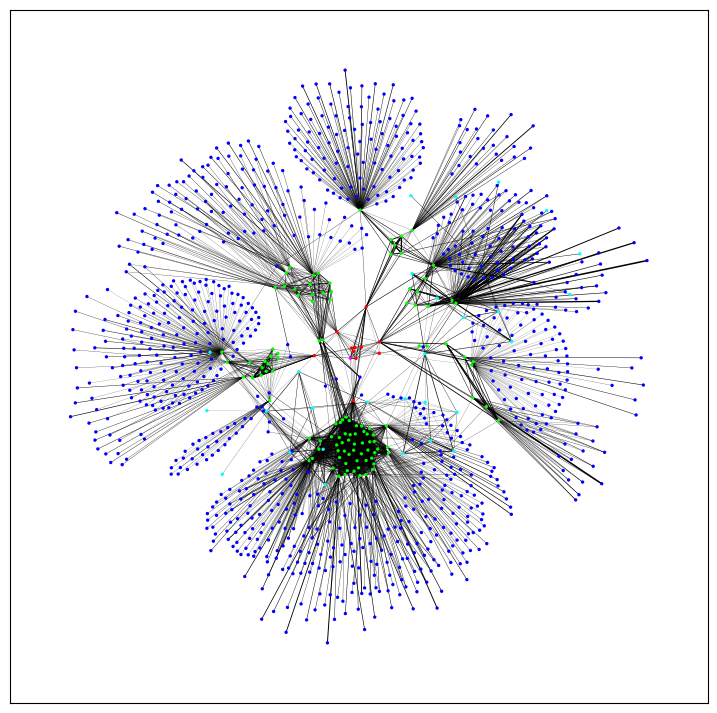

In [63]:
plt.figure(1, figsize=(9, 9))
# nx.draw(g, pos=pos)
nx.draw_networkx_edges(g, pos, width=edges)
nx.draw_networkx_nodes(g, pos, node_color=nodeCols, node_size=2)
# nx.draw_networkx_labels(g, pos)